# reconstruct the scene in 3D

Coordinates in mm

| Coordinate | x  | y  | z  |
|------------|----|----|----|
| 0: origin  | 0  | 0  | 0  |
| 1: lever tip | 49 | 24 | 15 |
| 2: upper lever tip | 49 | 87 | 82 |
| 3: stick head | -9 | 35 | 9 |
| 4: ball | 86 | 34 | 15 |
| 5: sliding door | 86 | 67 | 10 |


- Evaluation procedure
    - Determine 3D keypoints of lock box parts in lock-box co-ordinates
    - Compute projection matrices of all cameras
    - Triangulate DeepLabCut tracked body-part image coordinates
    - Decide about behaviour based on proximity between body part and lock-box part
- problem (improve if time allows)
    - Missing and occluded body parts do not allow triangulation.
    - 90 degrees difference in perspective viewing does not easily allow accurate triangulation

In [1]:
lock_box_parts = {
    "origin": (0, 0, 0),
    "lever_tip": (49, 24, 15),
    "upper_lever_tip": (49, 87, 82),
    "stick_head": (-9, 35, 9),
    "ball": (86, 34, 15),
    "sliding_door": (86, 67, 10)
}

In [2]:
import os
import pandas as pd

# Initialize an empty list to store dataframes
dfs = []

# Traverse through the directory and subdirectories
for root, dirs, files in os.walk('/home/box/coding/CTIR/Moused-David-2024-05-18'):
    for file in files:
        if file == 'CollectedData_David.csv':
            # Create the full file path
            file_path = os.path.join(root, file)
            # Read the CSV file into a dataframe
            df = pd.read_csv(file_path, skiprows=2)  # Skip the first two rows
            dfs.append(df)

# Concatenate all dataframes
combined_df = pd.concat(dfs, ignore_index=True)

In [3]:
clean_df = combined_df.drop('coords', axis=1)

In [4]:
clean_df

,Unnamed: 1,Unnamed: 2,x,y,x.1,y.1,x.2,y.2,x.3,y.3,x.4,y.4,x.5,y.5,x.6,y.6,x.7,y.7,x.8,y.8
0,E1_front,img07033.png,623.970615,379.262027,599.764627,297.204592,564.424333,275.544411,367.121737,418.146691,518.045128,110.166567,NaN,NaN,253.754902,440.364922,687.598320,416.285686,750.757011,407.742482
1,E1_front,img07615.png,803.327401,432.469448,862.480372,326.291103,796.397346,302.778416,660.271263,334.211166,530.008004,111.955531,490.486165,314.703347,255.267188,439.124196,686.856833,419.166161,747.136990,402.936888
2,E1_front,img07675.png,734.373087,442.353816,821.736674,311.360135,739.963387,289.259247,NaN,NaN,529.264531,112.631834,491.206000,315.315959,253.730020,441.018232,683.866065,417.602548,NaN,NaN
3,E1_front,img10820.png,672.456613,350.353558,582.181650,265.979782,631.677535,265.525691,414.168096,424.003341,529.148591,113.793800,NaN,NaN,172.257725,446.843763,686.706606,418.294373,746.604355,402.620196
4,E1_front,img11181.png,648.956749,397.505157,709.842234,265.339106,614.553976,271.279153,NaN,NaN,528.335308,111.773881,490.524195,317.912437,170.927288,448.206820,685.763190,417.616319,751.152249,407.172233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,E1_top,img09937.png,313.388117,280.752965,231.751969,287.233902,271.257859,344.449329,179.531540,366.699773,338.370932,306.866132,344.123181,511.085607,553.347223,199.134567,253.289102,191.700694,211.389094,221.436184
76,E1_top,img11890.png,366.824607,387.008796,383.043965,448.507195,428.998813,419.447512,409.211317,574.810883,340.156185,307.449786,342.824305,510.226939,555.384567,194.944041,254.331644,192.275921,209.862970,221.180559
77,E1_top,img12796.png,465.557845,208.729330,425.536039,242.080836,474.896267,257.200185,415.919708,374.120588,338.877758,303.160897,340.229371,510.633517,562.569736,196.383457,251.022903,189.625391,210.474508,220.036687
78,E1_top,img14500.png,371.212458,253.080241,310.618368,203.150711,321.282927,258.897273,199.125235,295.011351,346.161625,162.617730,337.222919,304.485806,590.490893,196.490588,252.252064,193.749593,208.396139,223.900542


In [5]:
# check for only E1 as the coordinates are different in both experiments
clean_df_E1 = clean_df[clean_df['Unnamed: 1'].str.contains("E1", na=False)]
new_column_names = [
    'Unnamed: 1', 'Unnamed: 2',
    'nose_x', 'nose_y', 'ear_left_x', 'ear_left_y', 
    'ear_right_x', 'ear_right_y', 'tail_base_x', 'tail_base_y',
    'lever_tip_x', 'lever_tip_y', 'upper_lever_tip_x', 'upper_lever_tip_y',
    'stick_head_x', 'stick_head_y', 'ball_x', 'ball_y', 
    'sliding_door_x', 'sliding_door_y'
]
# Assign new column names
clean_df_E1.columns = new_column_names
clean_df_E1.reset_index(drop=True, inplace=True)

clean_df_E1

,Unnamed: 1,Unnamed: 2,nose_x,nose_y,ear_left_x,ear_left_y,ear_right_x,ear_right_y,tail_base_x,tail_base_y,lever_tip_x,lever_tip_y,upper_lever_tip_x,upper_lever_tip_y,stick_head_x,stick_head_y,ball_x,ball_y,sliding_door_x,sliding_door_y
0,E1_front,img07033.png,623.970615,379.262027,599.764627,297.204592,564.424333,275.544411,367.121737,418.146691,518.045128,110.166567,NaN,NaN,253.754902,440.364922,687.598320,416.285686,750.757011,407.742482
1,E1_front,img07615.png,803.327401,432.469448,862.480372,326.291103,796.397346,302.778416,660.271263,334.211166,530.008004,111.955531,490.486165,314.703347,255.267188,439.124196,686.856833,419.166161,747.136990,402.936888
2,E1_front,img07675.png,734.373087,442.353816,821.736674,311.360135,739.963387,289.259247,NaN,NaN,529.264531,112.631834,491.206000,315.315959,253.730020,441.018232,683.866065,417.602548,NaN,NaN
3,E1_front,img10820.png,672.456613,350.353558,582.181650,265.979782,631.677535,265.525691,414.168096,424.003341,529.148591,113.793800,NaN,NaN,172.257725,446.843763,686.706606,418.294373,746.604355,402.620196
4,E1_front,img11181.png,648.956749,397.505157,709.842234,265.339106,614.553976,271.279153,NaN,NaN,528.335308,111.773881,490.524195,317.912437,170.927288,448.206820,685.763190,417.616319,751.152249,407.172233
5,E1_front,img12791.png,320.875559,415.151827,411.281942,317.231778,330.328237,319.655541,NaN,NaN,529.867616,111.586489,NaN,NaN,156.659342,449.512637,685.594745,417.799760,751.431510,406.973270
6,E1_front,img13908.png,617.096240,448.058054,669.907507,310.484055,583.769944,305.640979,NaN,NaN,527.363035,112.405180,481.553056,317.648230,106.362865,451.234069,685.524499,419.475745,746.559245,408.873465
7,E1_front,img14139.png,NaN,NaN,317.425808,228.275168,403.138568,224.643559,389.451345,420.998276,541.260988,438.857995,508.900332,112.763795,106.217778,447.867601,684.170076,420.046924,754.091958,406.903713
8,E1_front,img15806.png,570.612736,420.572652,673.957798,311.582139,593.394455,310.711184,NaN,NaN,536.593256,454.609652,501.155487,112.808224,74.264013,457.160338,589.149502,468.431179,NaN,NaN
9,E1_side,img04322.png,767.991161,346.953377,804.637878,206.937643,720.224060,214.772458,NaN,NaN,805.058530,354.179580,496.333123,80.664452,738.042425,425.963455,NaN,NaN,720.477371,329.088004


In [6]:
import matplotlib.pyplot as plt

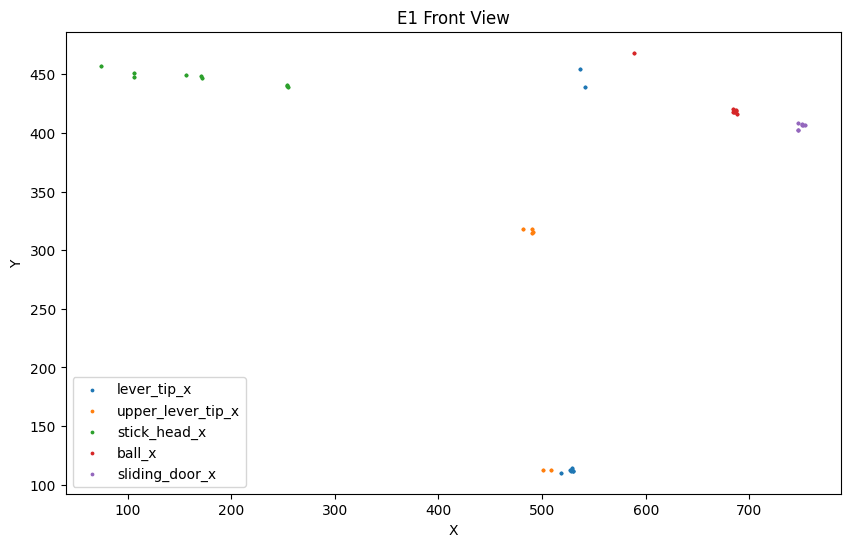

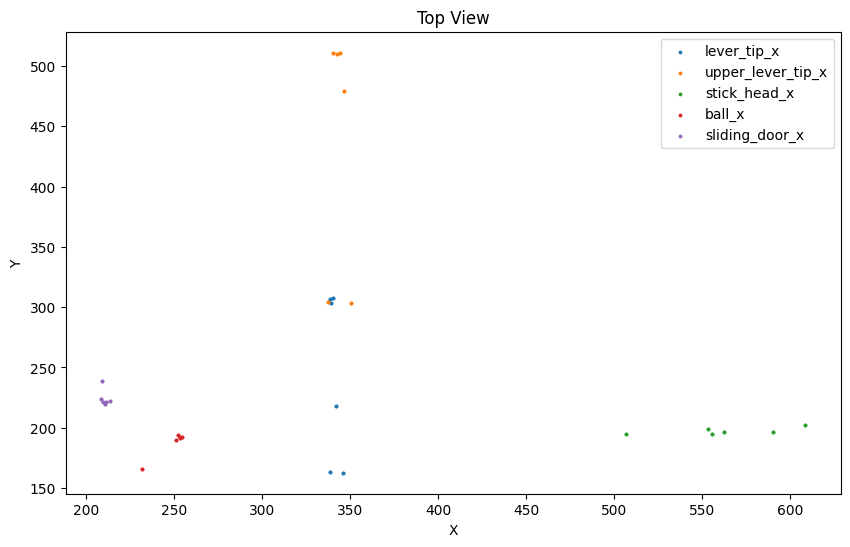

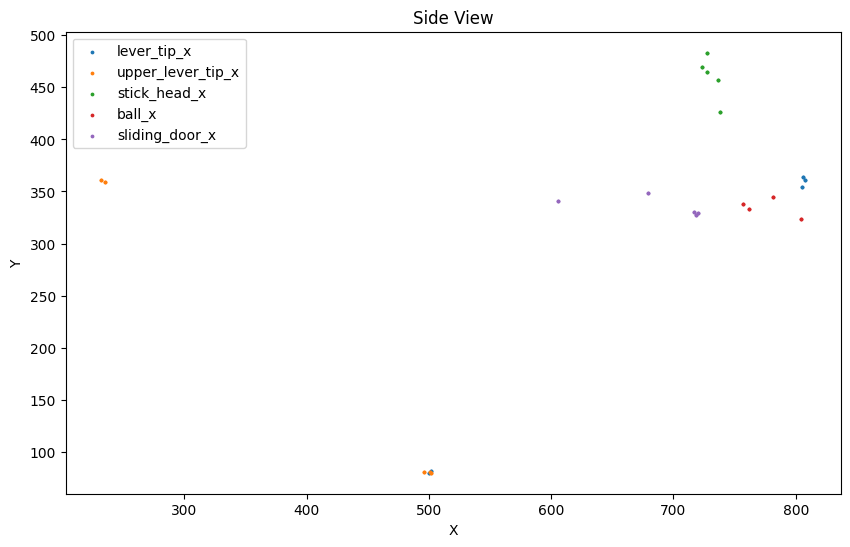

In [7]:
# for each of these I would like to see where they group
df_front = clean_df_E1[clean_df_E1['Unnamed: 1'].str.contains("front", na=False)]
df_top = clean_df_E1[clean_df_E1['Unnamed: 1'].str.contains("top", na=False)]
df_side = clean_df_E1[clean_df_E1['Unnamed: 1'].str.contains("side", na=False)]

# Define the columns to plot
columns_to_plot = [
    'lever_tip_x', 'lever_tip_y', 
    'upper_lever_tip_x', 'upper_lever_tip_y',
    'stick_head_x', 'stick_head_y', 
    'ball_x', 'ball_y', 
    'sliding_door_x', 'sliding_door_y'
]

# Function to create scatter plots
def plot_data(df, title):
    plt.figure(figsize=(10, 6))
    for i in range(0, len(columns_to_plot), 2):
        plt.scatter(df[columns_to_plot[i]], df[columns_to_plot[i + 1]], label=columns_to_plot[i], s=3)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# Plot data for each view
plot_data(df_front, 'E1 Front View')
plot_data(df_top, 'Top View')
plot_data(df_side, 'Side View')

- looking at the plots we can see each keypoint follows a certain trajectory
- except for the ball which is either at the starting location or anywhere else
- for the non ball lock box elements we will assume one end of the trajectory as closed and a certain divergence as open

In [8]:
# first let's normalize the data coordinates
E1_front_ref = 'img00519.png'
E1_side_ref = 'img00736.png'
E1_top_ref = 'img00603.png'

E2_front_ref = 'img03485.png'
E2_side_ref = 'img03172.png'
E2_top_ref = 'img03322.png'

- task
    - figure out plateau corner coordinates
    - relabel elements
    - normalize

In [9]:
lock_box_parts

{'origin': (0, 0, 0),
 'lever_tip': (49, 24, 15),
 'upper_lever_tip': (49, 87, 82),
 'stick_head': (-9, 35, 9),
 'ball': (86, 34, 15),
 'sliding_door': (86, 67, 10)}

In [15]:
clean_df_E1

,Unnamed: 1,Unnamed: 2,nose_x,nose_y,ear_left_x,ear_left_y,ear_right_x,ear_right_y,tail_base_x,tail_base_y,lever_tip_x,lever_tip_y,upper_lever_tip_x,upper_lever_tip_y,stick_head_x,stick_head_y,ball_x,ball_y,sliding_door_x,sliding_door_y
0,E1_front,img07033.png,623.970615,379.262027,599.764627,297.204592,564.424333,275.544411,367.121737,418.146691,518.045128,110.166567,NaN,NaN,253.754902,440.364922,687.598320,416.285686,750.757011,407.742482
1,E1_front,img07615.png,803.327401,432.469448,862.480372,326.291103,796.397346,302.778416,660.271263,334.211166,530.008004,111.955531,490.486165,314.703347,255.267188,439.124196,686.856833,419.166161,747.136990,402.936888
2,E1_front,img07675.png,734.373087,442.353816,821.736674,311.360135,739.963387,289.259247,NaN,NaN,529.264531,112.631834,491.206000,315.315959,253.730020,441.018232,683.866065,417.602548,NaN,NaN
3,E1_front,img10820.png,672.456613,350.353558,582.181650,265.979782,631.677535,265.525691,414.168096,424.003341,529.148591,113.793800,NaN,NaN,172.257725,446.843763,686.706606,418.294373,746.604355,402.620196
4,E1_front,img11181.png,648.956749,397.505157,709.842234,265.339106,614.553976,271.279153,NaN,NaN,528.335308,111.773881,490.524195,317.912437,170.927288,448.206820,685.763190,417.616319,751.152249,407.172233
5,E1_front,img12791.png,320.875559,415.151827,411.281942,317.231778,330.328237,319.655541,NaN,NaN,529.867616,111.586489,NaN,NaN,156.659342,449.512637,685.594745,417.799760,751.431510,406.973270
6,E1_front,img13908.png,617.096240,448.058054,669.907507,310.484055,583.769944,305.640979,NaN,NaN,527.363035,112.405180,481.553056,317.648230,106.362865,451.234069,685.524499,419.475745,746.559245,408.873465
7,E1_front,img14139.png,NaN,NaN,317.425808,228.275168,403.138568,224.643559,389.451345,420.998276,541.260988,438.857995,508.900332,112.763795,106.217778,447.867601,684.170076,420.046924,754.091958,406.903713
8,E1_front,img15806.png,570.612736,420.572652,673.957798,311.582139,593.394455,310.711184,NaN,NaN,536.593256,454.609652,501.155487,112.808224,74.264013,457.160338,589.149502,468.431179,NaN,NaN
9,E1_side,img04322.png,767.991161,346.953377,804.637878,206.937643,720.224060,214.772458,NaN,NaN,805.058530,354.179580,496.333123,80.664452,738.042425,425.963455,NaN,NaN,720.477371,329.088004


In [16]:
clean_df_E1[clean_df_E1["Unnamed: 2"] == E1_side_ref]

,Unnamed: 1,Unnamed: 2,nose_x,nose_y,ear_left_x,ear_left_y,ear_right_x,ear_right_y,tail_base_x,tail_base_y,lever_tip_x,lever_tip_y,upper_lever_tip_x,upper_lever_tip_y,stick_head_x,stick_head_y,ball_x,ball_y,sliding_door_x,sliding_door_y
